In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

2023-11-01 01:47:29.197043: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-11-01 01:47:32.901118: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-01 01:47:32.904128: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-11-01 01:47:33.266888: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-01 01:47:33.269430: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [7]:
X_train, y_train, X_test, y_test = C.Helper.normalization(DATAPATH, X_train, y_train, X_test, y_test)

In [8]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key(y_train)

In [9]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13458, 512, 512, 1) (13458, 512, 512, 1) (3308, 512, 512, 1) (3308, 512, 512, 1)


In [10]:
X_train, y_train = C.Helper.filter_slices(X_train, y_train)

(534, 512, 512, 1) (534, 512, 512, 1)


In [11]:
X_train_set = X_train[:last_key]
y_train_set = y_train[:last_key]
X_val = X_train[last_key:]
y_val = y_train[last_key:]

In [12]:
train_gen = C.Helper.augment_2(X_train_set, y_train_set)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [13]:
sample_batch = next(train_gen)
xx, yy = sample_batch
print(xx.shape, yy.shape)

(2, 512, 512, 1) (2, 512, 512, 1)


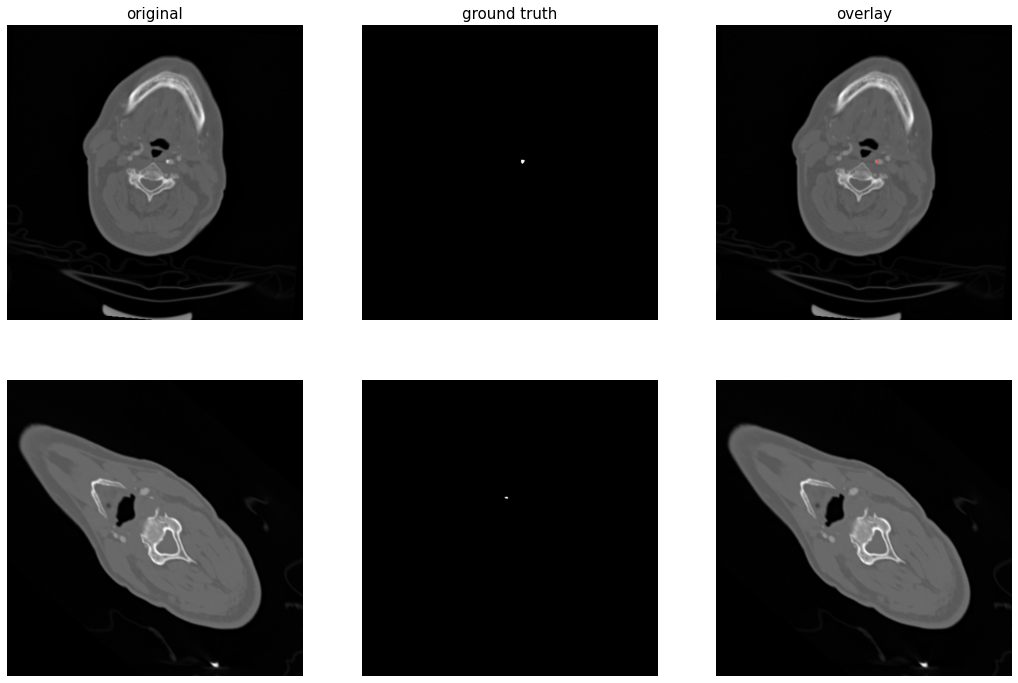

In [14]:
from keras_unet.utils import plot_imgs

plot_imgs(org_imgs=xx, mask_imgs=yy, nm_img_to_plot=2, figsize=6)

In [15]:
model = C.Helper.create_unet(X_train_set[0].shape)

2023-11-01 01:54:58.706834: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-01 01:54:58.709402: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-01 01:54:58.719208: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2023-11-01 01:54:58.722084: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-01 01:54:58.724539: I tensorflow/core

In [16]:
model, history = C.Helper.train_unet(train_gen, X_train_set, y_train_set, X_val, y_val, model, steps_per_epoch=len(X_train) // 2,epochs=200)

2023-11-01 01:54:59.512630: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-11-01 01:54:59.532749: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-11-01 01:55:00.888750: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-11-01 01:55:02.179286: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-11-01 01:55:03.812383: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-11-01 01:55:03.812405: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-11-01 01:55:03.813296: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-11-01 01:55:03.878574: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-11-01 01:55:05.351483: I tensorflow/stream_exec

203/203 [==============================] - 50s 192ms/step - loss: 0.0227 - iou: 0.0065 - iou_thresholded: 0.0170 - val_loss: 0.0019 - val_iou: 3.7064e-04 - val_iou_thresholded: 7.7986e-04
Epoch 2/200
203/203 [==============================] - 20s 100ms/step - loss: 0.0021 - iou: 0.0070 - iou_thresholded: 0.0179 - val_loss: 0.0017 - val_iou: 4.4079e-04 - val_iou_thresholded: 7.7986e-04
Epoch 3/200
203/203 [==============================] - 21s 102ms/step - loss: 0.0020 - iou: 0.0063 - iou_thresholded: 0.0178 - val_loss: 0.0017 - val_iou: 5.2441e-04 - val_iou_thresholded: 7.7986e-04
Epoch 4/200
203/203 [==============================] - 20s 101ms/step - loss: 0.0017 - iou: 0.0075 - iou_thresholded: 0.0175 - val_loss: 0.0011 - val_iou: 0.0048 - val_iou_thresholded: 7.7986e-04
Epoch 5/200
203/203 [==============================] - 21s 101ms/step - loss: 0.0013 - iou: 0.0112 - iou_thresholded: 0.0180 - val_loss: 0.0012 - val_iou: 0.0107 - val_iou_thresholded: 7.7986e-04
Epoch 6/200
203/203 

Epoch 42/200
203/203 [==============================] - 20s 100ms/step - loss: 6.2458e-04 - iou: 0.1251 - iou_thresholded: 0.0618 - val_loss: 3.8744e-04 - val_iou: 0.1876 - val_iou_thresholded: 0.0882
Epoch 43/200
203/203 [==============================] - 21s 101ms/step - loss: 6.5537e-04 - iou: 0.1218 - iou_thresholded: 0.0808 - val_loss: 9.0244e-04 - val_iou: 0.0703 - val_iou_thresholded: 0.1472
Epoch 44/200
203/203 [==============================] - 20s 100ms/step - loss: 5.9367e-04 - iou: 0.1323 - iou_thresholded: 0.1301 - val_loss: 3.7995e-04 - val_iou: 0.2240 - val_iou_thresholded: 0.2910
Epoch 45/200
203/203 [==============================] - 21s 101ms/step - loss: 6.9234e-04 - iou: 0.1359 - iou_thresholded: 0.1188 - val_loss: 3.9026e-04 - val_iou: 0.1860 - val_iou_thresholded: 0.0608
Epoch 46/200
203/203 [==============================] - 20s 101ms/step - loss: 5.7132e-04 - iou: 0.1365 - iou_thresholded: 0.1221 - val_loss: 5.0750e-04 - val_iou: 0.1210 - val_iou_thresholded: 0.

Epoch 83/200
203/203 [==============================] - 20s 100ms/step - loss: 6.0389e-04 - iou: 0.1917 - iou_thresholded: 0.2560 - val_loss: 3.2003e-04 - val_iou: 0.2618 - val_iou_thresholded: 0.3559
Epoch 84/200
203/203 [==============================] - 21s 101ms/step - loss: 4.3145e-04 - iou: 0.2155 - iou_thresholded: 0.2728 - val_loss: 2.8693e-04 - val_iou: 0.3203 - val_iou_thresholded: 0.5198
Epoch 85/200
203/203 [==============================] - 20s 100ms/step - loss: 5.2760e-04 - iou: 0.2306 - iou_thresholded: 0.3256 - val_loss: 2.9131e-04 - val_iou: 0.3112 - val_iou_thresholded: 0.4618
Epoch 86/200
203/203 [==============================] - 20s 101ms/step - loss: 4.3066e-04 - iou: 0.2440 - iou_thresholded: 0.3429 - val_loss: 3.0744e-04 - val_iou: 0.3313 - val_iou_thresholded: 0.4137
Epoch 87/200
203/203 [==============================] - 21s 101ms/step - loss: 5.7634e-04 - iou: 0.2133 - iou_thresholded: 0.2843 - val_loss: 4.2376e-04 - val_iou: 0.2320 - val_iou_thresholded: 0.

Epoch 124/200
203/203 [==============================] - 20s 100ms/step - loss: 4.4602e-04 - iou: 0.3181 - iou_thresholded: 0.4369 - val_loss: 2.9479e-04 - val_iou: 0.3286 - val_iou_thresholded: 0.4445
Epoch 125/200
203/203 [==============================] - 21s 101ms/step - loss: 3.7973e-04 - iou: 0.3095 - iou_thresholded: 0.4191 - val_loss: 2.3693e-04 - val_iou: 0.3744 - val_iou_thresholded: 0.5808
Epoch 126/200
203/203 [==============================] - 20s 100ms/step - loss: 3.5663e-04 - iou: 0.3523 - iou_thresholded: 0.4699 - val_loss: 3.2397e-04 - val_iou: 0.2757 - val_iou_thresholded: 0.4926
Epoch 127/200
203/203 [==============================] - 20s 101ms/step - loss: 3.3268e-04 - iou: 0.3592 - iou_thresholded: 0.4843 - val_loss: 2.0472e-04 - val_iou: 0.4558 - val_iou_thresholded: 0.5839
Epoch 128/200
203/203 [==============================] - 20s 100ms/step - loss: 3.1161e-04 - iou: 0.3514 - iou_thresholded: 0.4635 - val_loss: 2.4975e-04 - val_iou: 0.4534 - val_iou_thresholde

203/203 [==============================] - 21s 101ms/step - loss: 3.2002e-04 - iou: 0.3665 - iou_thresholded: 0.4898 - val_loss: 1.6055e-04 - val_iou: 0.5430 - val_iou_thresholded: 0.6995
Epoch 165/200
203/203 [==============================] - 20s 100ms/step - loss: 3.2636e-04 - iou: 0.3691 - iou_thresholded: 0.4835 - val_loss: 1.7110e-04 - val_iou: 0.4885 - val_iou_thresholded: 0.6789
Epoch 166/200
203/203 [==============================] - 21s 101ms/step - loss: 2.9051e-04 - iou: 0.3888 - iou_thresholded: 0.5060 - val_loss: 2.4359e-04 - val_iou: 0.4072 - val_iou_thresholded: 0.5531
Epoch 167/200
203/203 [==============================] - 20s 100ms/step - loss: 3.0337e-04 - iou: 0.3958 - iou_thresholded: 0.5105 - val_loss: 2.1216e-04 - val_iou: 0.4541 - val_iou_thresholded: 0.6779
Epoch 168/200
203/203 [==============================] - 21s 101ms/step - loss: 2.8237e-04 - iou: 0.3754 - iou_thresholded: 0.4975 - val_loss: 2.3451e-04 - val_iou: 0.4487 - val_iou_thresholded: 0.5366
Epoc

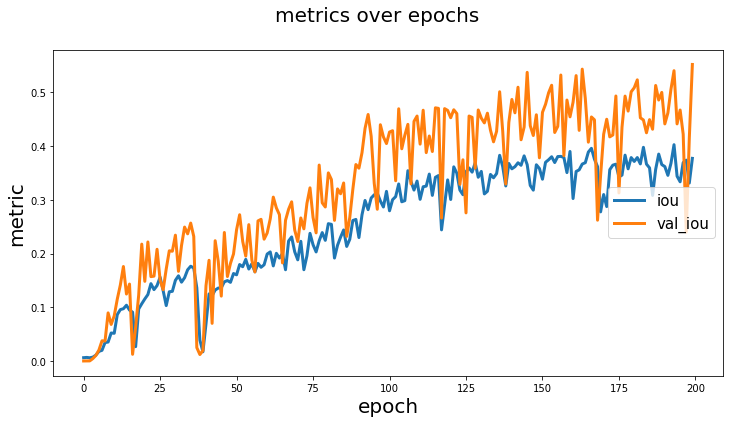

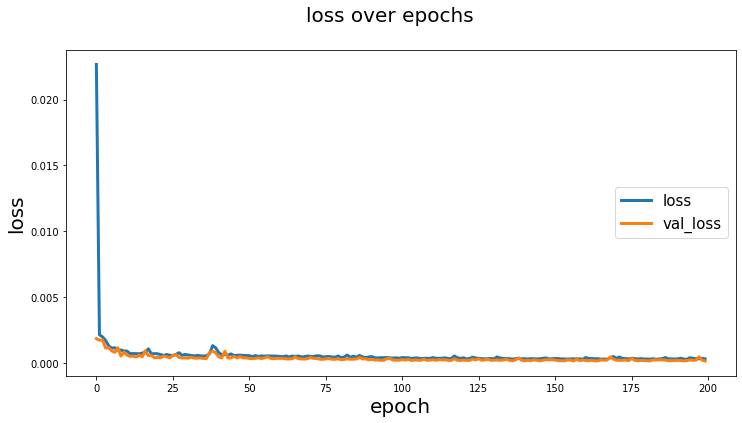

In [17]:
C.Helper.visualize_graph(history)

In [18]:
y_pred = C.Helper.prediction(X_test, model)

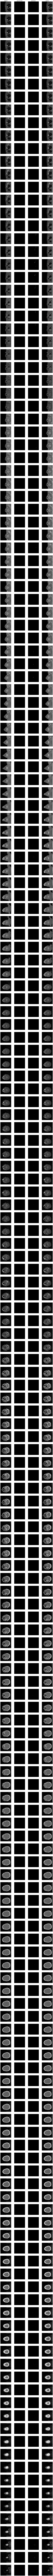

In [19]:
C.Helper.visualize_result(X_test, y_test, y_pred)

In [20]:
C.Helper.evaluate(X_test, y_test, model)

104/104 [==============================] - 23s 217ms/step - loss: 1.3882e-04 - iou: 0.1010 - iou_thresholded: 0.2162


In [ ]:
# feed slice test full